Introduction
Dimentional reduction happens before clusering My feature data includes 2017(which is the gdp-per-capita in the year of 2017 of all economies),Schizophrenia (%), Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Depression (%), average_learning_Adjusted_of_school,and the goal of the project is to cluster the economies into different groups(like Income group) based on the feature data.

Theory
KMEANS

It is a popular unsupervised machine learning algorithm, which is used to divide a given unlabeled dataset into a certain number of clusters, denoted as k.
One example of this is imagine you are at a farmer's market and you have a variety of fruits and you want to organize these fruits. And k-means clustering is you sorting these fruits into different bags according to their charactersitics, like color, size, shape, etc. So the first step is you need to determine the number of bags you want to sort these fruits(the number means K in K-means,which stands for the number of clusters). Then you randomly place these bags among the fruits and you put every friut to its cloest bag. After all the fruits are put into bags, you find the average characteristics of each bag and move the bag to the average position of the fruits in the bag. Then you repeat the process until the bags stop moving(The fruits no longer switch bags) And the result is you have a certain number of bags and each bag contains a certain number of fruits with similar characteristics. The goal is to have bags(clusters) where the fruits inside are more like each other than they are like fruits in other bags. And we use Elbow method, Silhouette method, Gap statistic to determine the number of bags we want to sort the fruits into.

Elbow method
we increase the number of bags and get relavent scores of how close fruits are within bags, and in the plot we will look for the point where adding another bags doesn't significantly improve the closeness - this point is the 'elbow'.
2. Silhouette method It is like each fruit can whisper tou you and tell you that how happy it is in its bag by give score. The Silhouette method is like listening to all those whispers to figure out if you've sorted the fruits into bags well by taking all these scores and averaging them to give an overall score. The score close to +1 means that the fruit is very happy because it's surrounded by similar fruits, and the socre about 0 means the fruit is cool and don't care about whcih bag it is in, and the score close to -1 means the fruit is very sad because it's surrounded by very different fruits. if many fruits are sad or cool, the he overall score will be low, you may need to reorganize the fruits into different bags by adjusting the number of bags or considering different fruit characteristics.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

It is like organizing a group of children playing in a park into clusters based on how close they are to each other. we don't need to decide how many groups you want beforehand, you set rules for what makes a group. Like a group needs at least five children, and all members of the group need to be within arm's reach of someone else in the group. Children who are close enough to a group join it, and groups might merge if they get close enough to each other. Some children who prefer playing alone and don't reach out to others are not part of any group(It is like the noise in the DBSCAN). DBSCAN works similarly. It groups points that are closely packed together, and points in low-density regions are marked as 'noise'. This method is gvery ood when you don't know how many clusters to expect, or when your data might have outliers. The silhouette score helps to evaluate how well the points are clustered, with higher scores indicating better-defined clusters.

Hierarchical Clustering
It is like building a family tree for a set of ancient artifacts found at an archaeological site. Instead of sorting them into separate bages, you try to understand how these artifacts are related to each other, from the oldest to the newest. Hierarchical clustering starts by assuming every artifact is its own family (cluster). Then, it gradually links artifacts into families by their similarities, like materials or designs, until all artifacts are united into one big family (cluster). This method creates a tree diagram called a dendrogram, which shows the 'family' relationships. It allows us to choose the level of similarity at which we want to stop combining artifacts into families, which in turn determines the number of clusters. We can use the dendrogram to visually identify where to 'cut' the tree to get a sensible number of families,with the elbow method or silhouette score serving as tools to help decide on the best 'cut', ensuring that artifacts in the same family are as similar as possible.


In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

df_reduction=pd.read_csv('./Data/Reduction.csv')
# print(df_reduction.isnull().sum())

# Replace non-numeric entries with NaN
df_reduction.iloc[:, 1:8] = df_reduction.iloc[:, 1:8].apply(pd.to_numeric, errors='coerce')
# [1:8] means from column 1 to column 7 because column 0 and 8 are not numeric
# The apply(pd.to_numeric, errors='coerce') method attempts to convert all entries in the specified columns to numeric values.
# If it encounters any entry that cannot be converted (like a string 'no data'), it replaces it with NaN (Not a Number), a standard missing dat

# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
df_reduction.iloc[:, 1:8] = imputer.fit_transform(df_reduction.iloc[:, 1:8])

#impute missing values with the mode
df_reduction['Income group'] = df_reduction['Income group'].fillna(df_reduction['Income group'].mode()[0])
df_reduction.isnull().sum()

#lable encoding: encode the categorical data into numeric 
label_encoder = LabelEncoder()
df_reduction['Income group'] = label_encoder.fit_transform(df_reduction['Income group'])
# df_reduction['Economy']=label_encoder.fit_transform(df_reduction['Economy'])
df_reduction.isnull().sum()
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_reduction.iloc[:, 1:])

# Creating a new DataFrame for the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=df_reduction.columns[1:])
scaled_df.drop(['Income group'], axis=1, inplace=True)
#after dimentional reduction, we drop the columns that are not important 'average_learning_Adjusted_of_school'and 'scaled_df.drop(['Depression (%)'], axis=1, inplace=True)'
scaled_df.drop(['average_learning_Adjusted_of_school'], axis=1, inplace=True)
scaled_df.drop(['Depression (%)'], axis=1, inplace=True)
scaled_df.head()  

/var/folders/px/bhxss9d10zs_wzsv0ck6sb200000gn/T/ipykernel_34909/8429475.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_reduction.iloc[:, 1:8] = df_reduction.iloc[:, 1:8].apply(pd.to_numeric, errors='coerce')


,2017,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%)
0,-0.702995,-1.079808,-0.179703,-0.920185,0.731688
1,-0.501116,-0.221633,-0.202660,-0.519143,-0.544877
2,-0.527644,-0.298235,0.523775,-0.281972,0.888053
3,1.340754,1.316321,1.443806,2.301250,1.092253
4,-0.526368,-0.916482,-0.715177,-0.521562,-0.620196


### K-Means Clustering

### Hyper-parameter tuning

/Users/bella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/bella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

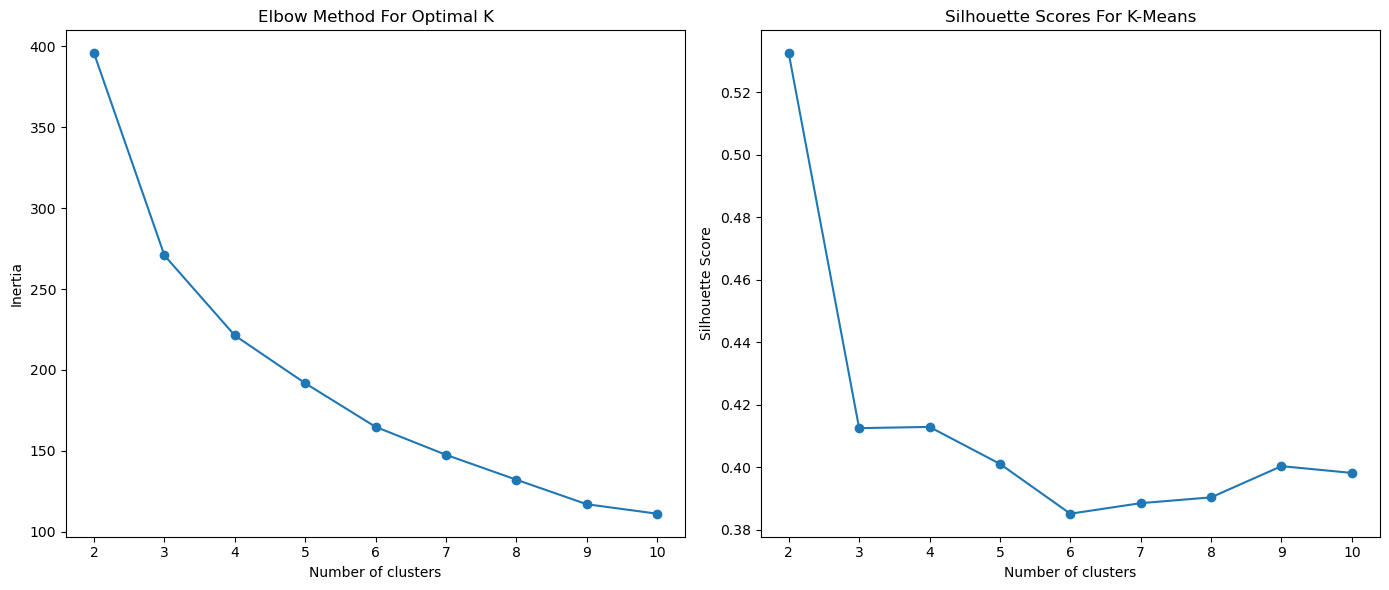

[395.6264643765347, 270.73403477419953, 221.27963486826846, 191.75725981806818, 164.810662792652, 147.53986259365348, 132.15740733843762, 117.00102367563264, 111.14912391808826]
[0.5323995929991122, 0.41255351593599066, 0.41295197246033155, 0.40113679560741355, 0.38519758564180123, 0.3885688102388548, 0.3904223089727881, 0.40040302538406963, 0.3982387901808518]


In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Determining the optimal number of clusters for K-Means using Elbow Method and Silhouette Score
inertia = [] # inertia values for different clusters of K-Means
#Inertia is the sum of squared distances of samples to their closest cluster center.
silhouette_scores = []  # silhouette scores for different clusters
K_range = range(2, 11) # defining the range of clusters to try(2-10)

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(scaled_df)
    inertia.append( kmeans.inertia_) #iertia is the sum of squared distances of samples to their closest cluster center.
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_)) #The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters.

# Plotting the Elbow Method results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For K-Means')

plt.tight_layout()
plt.show()
print(inertia)
print(silhouette_scores)


# Finding the 'elbow' point in the inertia plot
# This is typically done by visual inspection, but you can try an algorithmic approach
elbow_point = K_range[inertia.index(min(inertia, key=lambda x: abs(x - inertia[0]/2)))]

In [3]:
# Finding the highest silhouette score
highest_silhouette_score = max(silhouette_scores)
optimal_clusters_silhouette = silhouette_scores.index(highest_silhouette_score) + 2  # Adding 2 because range starts from 2
elbow_point, highest_silhouette_score, optimal_clusters_silhouette

(5, 0.5323995929991122, 2)

Elbow Method: The inertia plot again shows the sum of squared distances to the closest cluster center. The 'elbow' in this plot suggests the optimal number of clusters. inertia decreases with increasing k, however, after which the rate of decrease slows down and the point is called the elbow, and in this case, it is 4 

Silhouette Score: The silhouette score plot measures the quality of the clusters formed. Higher scores indicate more clearly defined clusters. The highest silhouette score is obtained with 2 clusters. 

These two methods suggest different optimal numbers of clusters. This is not uncommon, as different methods can highlight different aspects of the data's structure.    

### DBSCAN Clustering
#### Hyper-parameter tuning

    eps  min_samples  number of clusters  silhouett score
0   0.1            6                   2        -0.129657
1   0.2            6                   3        -0.028703
2   0.3            6                   4        -0.141168
3   0.4            6                   4        -0.062172
4   0.5            6                   6         0.157742
5   0.6            6                   4         0.291174
6   0.7            6                   4         0.345045
7   0.8            6                   4         0.365894
8   0.9            6                   3         0.325856
9   1.0            6                   3         0.434721
10  1.1            6                   3         0.450710
11  1.2            6                   3         0.472156
12  1.3            6                   2         0.425741
13  1.4            6                   2         0.446892
14  1.5            6                   2         0.487558
15  1.6            6                   2         0.508582
16  1.7       

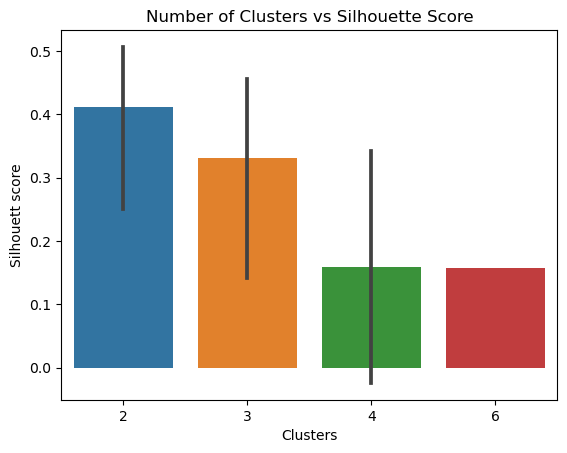

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, Birch, DBSCAN
import seaborn as sns
##eps_values will be tested as the eps parameter of the DBSCAN
#algorithm to determine the optimal distance within which points are considered neighbors.
eps_values = np.arange(0.1, 2.0, 0.1) # eps_values is the maximum distance between two samples for one to be considered as in the neighborhood of the other,
# Initialize the results list
results = []
# Iterate over all the combinations of eps and min_samples
for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=scaled_df.shape[1]+1) # min_samples must be be higher than the number of features at the very least(nd min_samples is the number of samples in a neighborhood for a point to be considered as a core point.)
    clusters = db.fit_predict(scaled_df)
    # Only calculate the silhouette score if there is more than one cluster
    # DBSCAN can sometimes mark all or nearly all points as noise, especially if eps is to
    if len(np.unique(clusters)) > 1:
        score = silhouette_score(scaled_df, clusters)
        results.append((eps, scaled_df.shape[1]+1, len(np.unique(clusters)), score))
# Convert the results list to a Pandas DataFrame
df = pd.DataFrame(results, columns=['eps', 'min_samples', 'number of clusters', 'silhouett score'])
print(df)
df.columns = df.columns.str.strip()
print(df.columns)
# Plot the silhouette score vs the number of clusters
sns.barplot(data=df, x = 'number of clusters', y = 'silhouett score')
plt.ylabel('Silhouett score')
plt.xlabel('Clusters')
plt.title('Number of Clusters vs Silhouette Score')
plt.show()

### Hierarchical Clustering
#### Hyper-parameter tuning

   Clusters  Silhouette score
0         2          0.550779
1         3          0.409917
2         4          0.413450
3         5          0.398937
4         6          0.364482
5         7          0.370408
6         8          0.377807
7         9          0.386036
8        10          0.368499


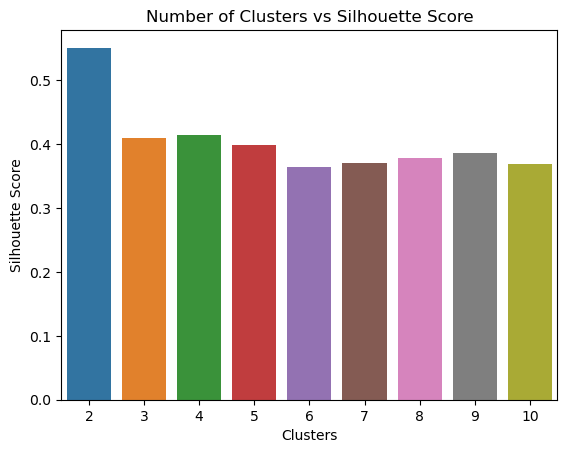

In [5]:
# Perform Agglomerative Clustering
Agg = AgglomerativeClustering
si_scores = []
for n in range(2,11):
    agglomerative = Agg(n_clusters = n)
    agglomerative.fit(scaled_df)
    si_scores.append((n, silhouette_score(scaled_df, agglomerative.labels_)))
    # The silhouette score is a measure of how similar an object is to its own cluster com
df = pd.DataFrame(si_scores, columns=["Clusters","Silhouette score"])
print(df)
sns.barplot(data=df, x = 'Clusters', y = 'Silhouette score')
plt.ylabel('Silhouette Score')
plt.xlabel('Clusters')
plt.title('Number of Clusters vs Silhouette Score')
plt.show()

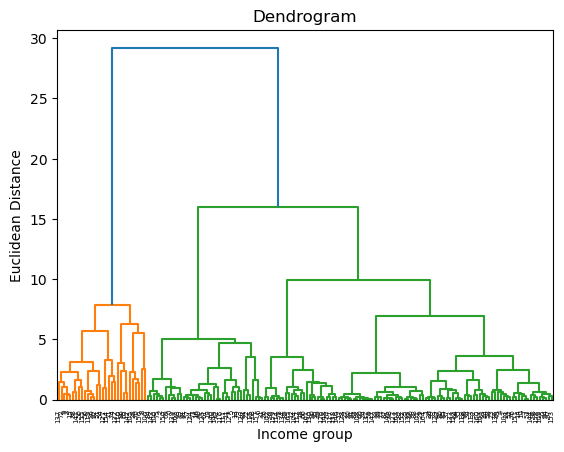

In [6]:
### Plot the clusters for Agglomerative Clustering
  # create linkage for agglomerative clustering, and the dendrogram for the linkage.
  #  Suggest the optimal number of clusters based on the dendrogram.
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(scaled_df, 'ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Income group')
plt.ylabel('Euclidean Distance')
plt.show()

### Final results
Re-do the analysis with the optimal parameter 2 using K-means, DBSCAN, and Hierarchical clustering.

In [7]:
# Applying K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_df)  ## This line fits the KMeans model to your scaled dataset 

# Cluster labels
cluster_labels = kmeans.labels_ ## This line extracts the cluster labels from the KMeans model

# Adding the cluster labels to the original DataFrame
df_clustered = df_reduction.copy()
df_clustered['Cluster'] = cluster_labels

# Analyzing the distribution of data points among the clusters
cluster_distribution = df_clustered['Cluster'].value_counts() ## This line counts the number of data points in each cluster

# Displaying the cluster centroids and distribution
centroids = kmeans.cluster_centers_ # This line retrieves the centroids of the clusters
print(df_clustered.head())
print(centroids)
print(cluster_distribution)

       Economy       2017  Schizophrenia (%)  Bipolar disorder (%)  \
0  Afghanistan    635.789           0.166158              0.708089   
1      Albania   4525.887           0.201025              0.704480   
2      Algeria   4014.707           0.197913              0.818687   
3      Andorra  40017.741           0.263512              0.963331   
4       Angola   4039.300           0.172794              0.623904   

   Eating disorders (%)  Anxiety disorders (%)  Depression (%)  \
0              0.107142               4.882481        4.136347   
1              0.174046               3.385245        2.208414   
2              0.213612               5.065876        3.661094   
3              0.644559               5.305375        3.729532   
4              0.173643               3.296906        4.160484   

   average_learning_Adjusted_of_school  Income group  Cluster  
0                             4.957542             1        0  
1                             8.526723             3  

/Users/bella/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
import plotly.express as px

# Assuming df_clustered is your DataFrame that includes PCA components and cluster assignments
# Replace 'PC1' and 'PC2' with the names of your principal component columns
# Replace 'Cluster' with the name of your cluster label column
# Replace 'country' with the name of the column you want to show on hover

fig = px.scatter(df_clustered, x='Schizophrenia (%)', y='Eating disorders (%)', color='Cluster', hover_data=['Economy'], template='simple_white')
## Remove the colorbar
fig.update(layout_coloraxis_showscale=False)
# Make the points larger
fig.update_traces(marker=dict(size=12),selector=dict(mode='markers'))
# Update layout if necessary
fig.update_layout(
    title='K-Means Clustering with PCA Components',
    xaxis_title='PC1',
    yaxis_title='PC2',
    legend_title='Cluster'
)

fig.show()

## Results
ALl clustering analysis methods. They all sugested that the data can be clustered into 2 groups is the best after the parameter tuning,except for the elbow method in K-means clustering, which suggested that the data can be clustered into 5 groups is the best. 

Using unsupervised learning methods(clustering), we can see the underlying information is discovered from the mental health data, whch is the unexpected groupings (cluster is 2)

When clustering algorithms with K-Means, DBSCAN, or Hierarchical Clustering consistently yield a certain number of clusters that doesn't match the expected number based on known labels (like my four income groups), it suggests a few possibilities: my data naturally falls into two distinct group, maybe there is a inherent data distribution, These groups might not align with predefined income categories, suggesting that the selected features do not differentiate the income groups as clearly as expected.



## Conclusions:
In my investigation into the patterns and structures within our dataset, we applied various clustering techniques to uncover hidden groupings that may reflect real-world distinctions among the subjects. The essence of our findings reveals that the complexities of mental health indicators and educational outcomes do not necessarily align neatly with economic categories such as income levels.

Unexpectedly, rather than observing four distinct groupings corresponding to high, upper-middle, lower-middle, and low income levels, our analysis consistently highlighted two predominant clusters. This suggests that the features we examined—ranging from schizophrenia to depression rates, and the average learning adjustments in schools—might interplay in ways that transcend traditional economic divisions.

This has profound implications for policymakers, educators, and healthcare providers. It suggests that strategies aimed at addressing mental health and education should not be overly tailored to economic status alone, as these issues are not confined to any one financial demographic. Instead, more universal approaches that cross these boundaries may be necessary to effectively address the needs highlighted by our findings.

Moreover, my analysis serves as a reminder of the complex human stories behind the data. Numbers and categories can only tell us so much; the lived experiences of individuals often defy simple categorization. This study underlines the importance of considering the full tapestry of human experience when crafting policies and interventions aimed at improving mental health and educational outcomes.

In conclusion, my exploration into the dataset has illuminated the intricate relationship between mental health, education, and income, underscoring the need for broad-spectrum solutions that are sensitive to the nuanced ways these domains interact. These insights can guide us toward more inclusive and effective approaches to supporting well-being and educational achievement across all economic strata.
